<a href="https://colab.research.google.com/github/Raihandany/PCVK_Ganjil_2023/blob/main/Week10_PCVK_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

Global Threshold

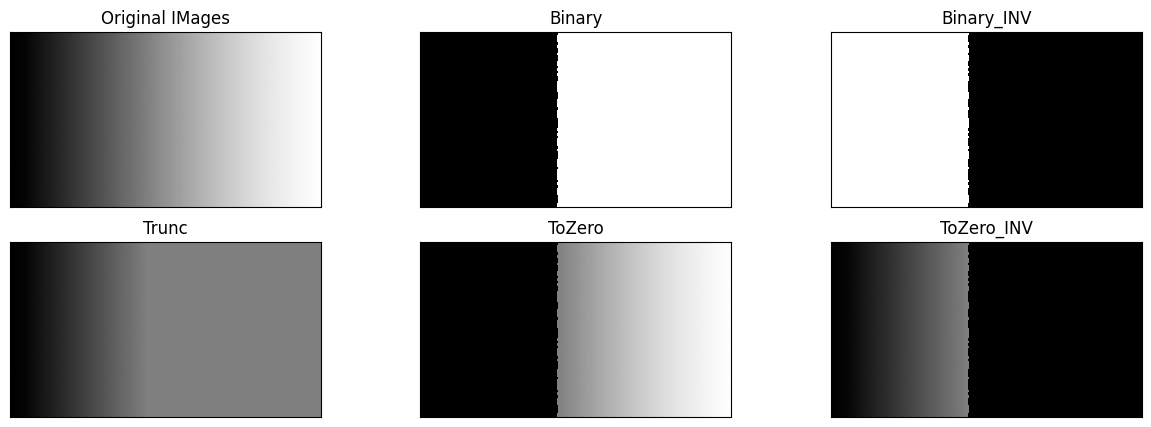

In [10]:
filename = ('/content/drive/MyDrive/PCVK_MM/prac_week10/gradient.jpg')

img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan

ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original IMages', 'Binary', 'Binary_INV', 'Trunc', 'ToZero', 'ToZero_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')

  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()




Global Threshold Not use OpenCV (ANSWER)

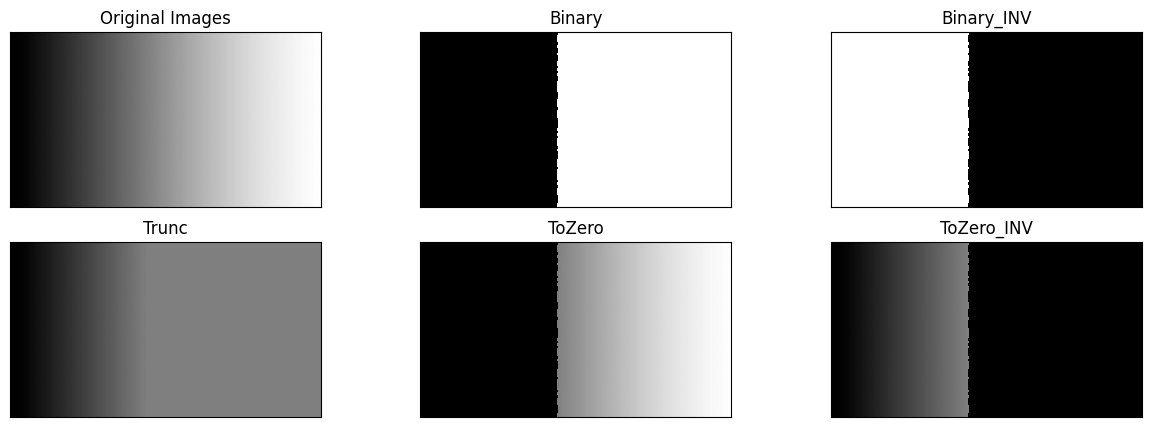

In [13]:
filename_new = ('/content/drive/MyDrive/PCVK_MM/prac_week10/gradient.jpg') #drive Image

img_new = cv.imread(filename_new) #Image
threshold_new = 127 #threshild define

#Global Thershold Without OpenCv Library
def binary_threshold(image, threshold):
    return (image >= threshold).astype(np.uint8) * 255

def binary_inv_threshold(image, threshold):
    return (image < threshold).astype(np.uint8) * 255

def trunc_threshold(image, threshold):
    return np.minimum(image, threshold).astype(np.uint8)

def tozero_threshold(image, threshold):
    return np.maximum(image - threshold, 0).astype(np.uint8)

def tozero_inv_threshold(image, threshold):
    return np.minimum(image, threshold).astype(np.uint8)

thresh1_new = binary_threshold(img, threshold_new)
thresh2_new = binary_inv_threshold(img, threshold_new)
thresh3_new = trunc_threshold(img, threshold_new)
thresh4_new = tozero_threshold(img, threshold_new)
thresh5_new = tozero_inv_threshold(img, threshold_new)

titles_new = ['Original Images', 'Binary', 'Binary_INV', 'Trunc', 'ToZero', 'ToZero_INV']
images_new = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images_new)):
  plt.subplot(2,3,i+1),plt.imshow(images_new[i],'gray', interpolation='nearest')
  plt.title(titles_new[i])
  plt.xticks([]),plt.yticks([])
plt.show()

#print("Binary Threshold Result:")
#print(binary_result)

#print("Binary Inverse Threshold Result:")
#print(binary_inv_result)

#print("Trunc Threshold Result:")
#print(trunc_result)

#print("Tozero Threshold Result:")
#print(tozero_result)

#print("Tozero Inverse Threshold Result:")
#print(tozero_inv_result)


Otsu's Threshold

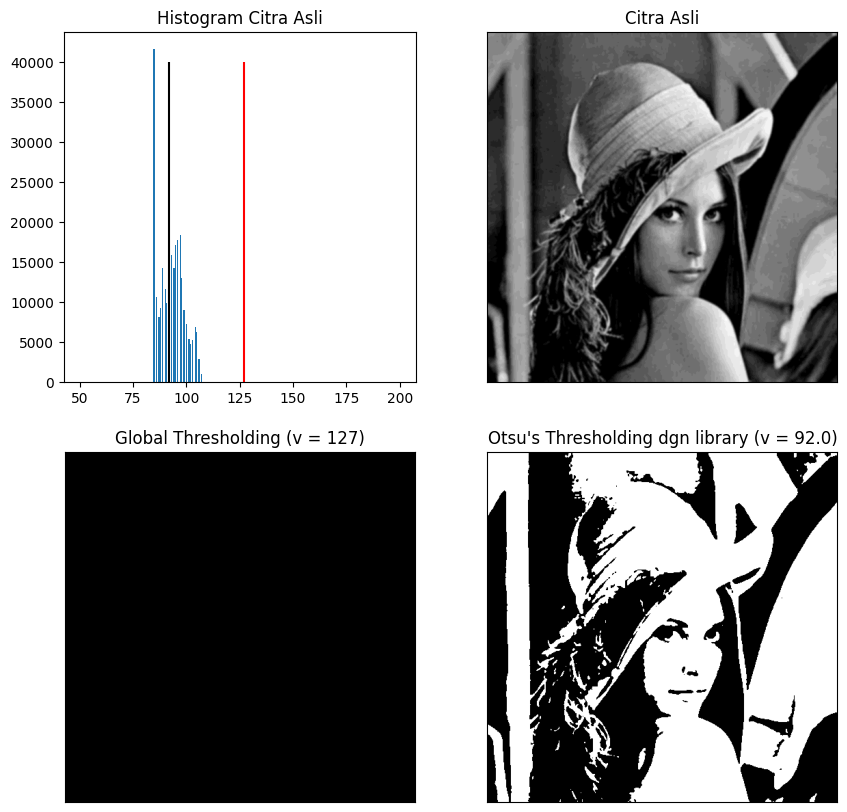

In [15]:
# Dengan Library
filename_ots = ('/content/drive/MyDrive/PCVK_MM/prac_week10/lena_gs_lc2.jpg')
img_ots = cv.imread(filename_ots,0)
blur = cv.GaussianBlur(img_ots,(5,5),0)
thresh_ots = 127

ret,th1 = cv.threshold(blur,thresh_ots,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles_ots = ['Citra Asli', 'Global Thresholding (v = 127)', x]
images_ots = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')            #garis vertikal merah menunjuka n threshold global 127
plt.vlines(ret2,0,40000,colors='black')         #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(images_ots)):
  plt.subplot(2,2,i+2),plt.imshow(images_ots[i],'gray')
  plt.title(titles_ots[i])
  plt.xticks([]),plt.yticks([])
plt.show()


Otsu's Thresholding Without OpenCV (ANSWER)

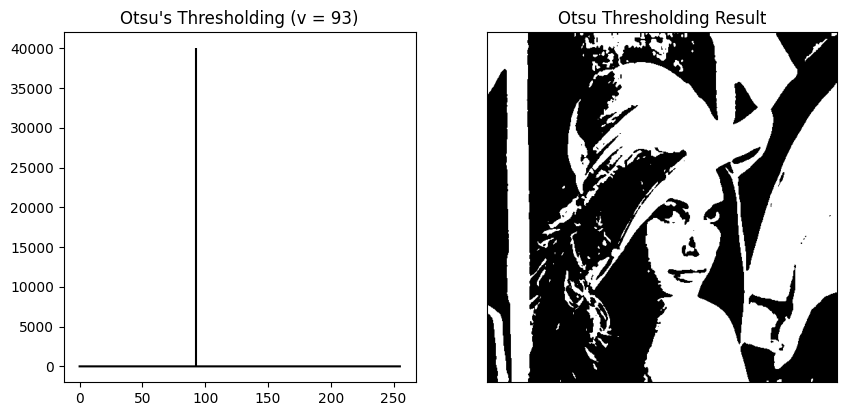

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename_ots = '/content/drive/MyDrive/PCVK_MM/prac_week10/lena_gs_lc2.jpg'
img_ots = cv.imread(filename_ots, 0)

# Apply Gaussian blur
blur = cv.GaussianBlur(img_ots, (5, 5), 0)

# Calculate the histogram
histogram = cv.calcHist([blur], [0], None, [256], [0, 256])
histogram = histogram.reshape(-1)

# Calculate the probabilities and mean values for each intensity level
histogram /= histogram.sum()
intensity_values = np.arange(256)
mean_values = np.arange(256) * histogram

# Initialize variables for Otsu's thresholding
total_intensity = np.sum(intensity_values * histogram)
max_variance = 0
optimal_threshold = 0

# Calculate Otsu's threshold
for threshold in range(256):
    w0 = np.sum(histogram[:threshold])
    w1 = np.sum(histogram[threshold:])

    if w0 == 0 or w1 == 0:
        continue

    p0 = w0 / histogram.sum()
    p1 = w1 / histogram.sum()

    mu0 = np.sum(intensity_values[:threshold] * histogram[:threshold]) / w0
    mu1 = np.sum(intensity_values[threshold:] * histogram[threshold:]) / w1

    variance = p0 * p1 * ((mu0 - mu1) ** 2)

    if variance > max_variance:
        max_variance = variance
        optimal_threshold = threshold

# Apply the optimal threshold to the image to perform binary segmentation
thresholded_image = (blur > optimal_threshold) * 255

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(histogram, color='black')
plt.title('Histogram Citra Asli')

plt.vlines(optimal_threshold, 0, 40000, colors='black')  # Otsu's threshold
plt.title("Otsu's Thresholding (v = " + str(optimal_threshold) + ")")

plt.subplot(2, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Otsu Thresholding Result')
plt.xticks([]), plt.yticks([])

plt.show()


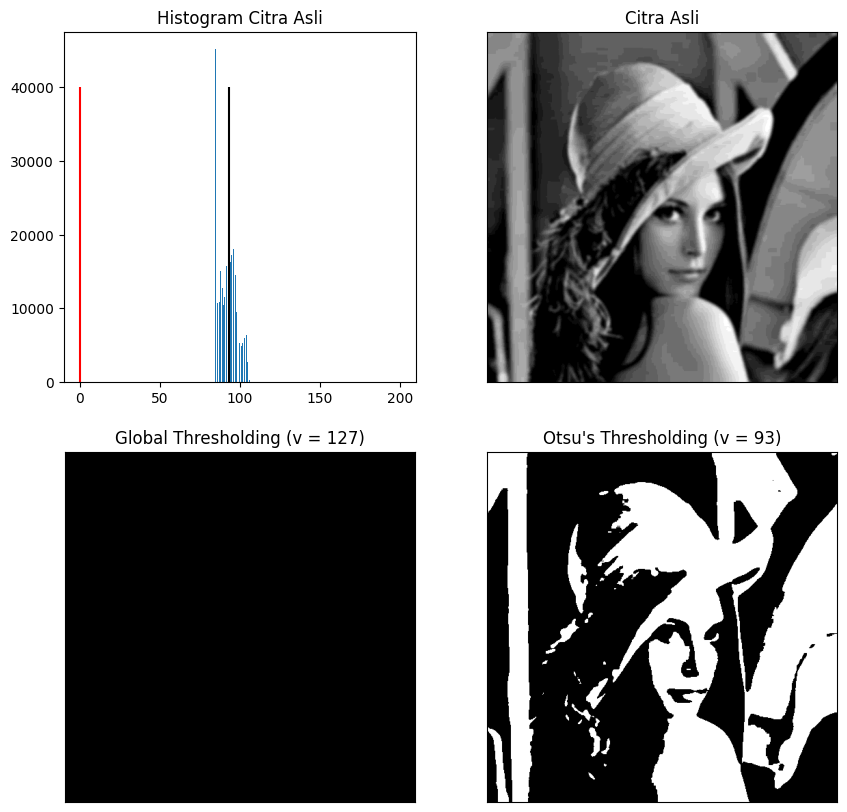

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
filename_ots = '/content/drive/MyDrive/PCVK_MM/prac_week10/lena_gs_lc2.jpg'
img_ots = Image.open(filename_ots).convert('L')
img_array = np.array(img_ots)

# Apply Gaussian blur
from scipy.ndimage import gaussian_filter
blur = gaussian_filter(img_array, sigma=2)

# Global threshold
thresh_ots = 127

# Calculate the histogram
histogram = np.histogram(blur, bins=256, range=(0, 256))[0]

# Calculate cumulative distribution and intensity values
cumulative_dist = np.cumsum(histogram)
intensity_values = np.arange(256)

# Calculate global threshold
optimal_threshold = np.argmax(cumulative_dist > (cumulative_dist[-1] * thresh_ots / 100))

# Apply global thresholding
th1 = (blur > optimal_threshold) * 255

# Calculate Otsu's threshold
total_pixels = blur.size
max_variance = 0
optimal_otsu_threshold = 0

for t in range(1, 255):
    p0 = np.sum(histogram[:t]) / total_pixels
    p1 = 1 - p0
    if p0 == 0 or p1 == 0:
        continue

    mu0 = np.sum(intensity_values[:t] * histogram[:t]) / (total_pixels * p0)
    mu1 = np.sum(intensity_values[t:] * histogram[t:]) / (total_pixels * p1)

    variance_between_classes = p0 * p1 * (mu0 - mu1) ** 2

    if variance_between_classes > max_variance:
        max_variance = variance_between_classes
        optimal_otsu_threshold = t

# Apply Otsu's thresholding
th2 = (blur > optimal_otsu_threshold) * 255

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.hist(blur.ravel(), 256, [50, 200])
plt.vlines(optimal_threshold, 0, 40000, colors='red')
plt.vlines(optimal_otsu_threshold, 0, 40000, colors='black')
plt.title('Histogram Citra Asli')

x = ("Otsu's Thresholding (v = " + str(optimal_otsu_threshold) + ")")
titles_ots = ['Citra Asli', 'Global Thresholding (v = 127)', x]
images_ots = [blur, th1, th2]

for i in range(len(images_ots)):
    plt.subplot(2, 2, i + 2), plt.imshow(images_ots[i], cmap='gray')
    plt.title(titles_ots[i])
    plt.xticks([]), plt.yticks([])

plt.show()


Answer Number 5

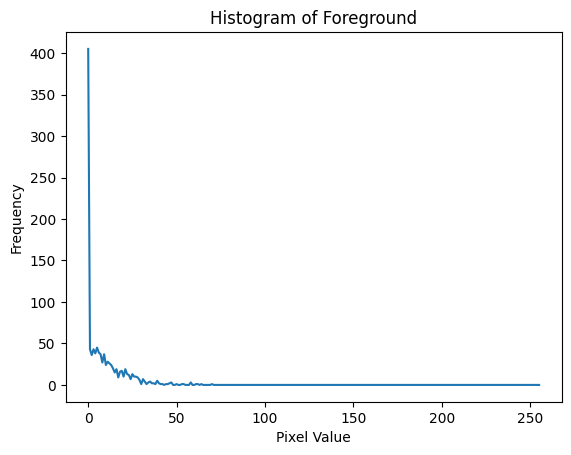

In [20]:
filename = ('/content/drive/MyDrive/PCVK_MM/prac_week10/lily.jpg') #drive Image

image = cv.imread(filename)

#chans = cv.split(image)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

mask = cv.inRange(image, (0, 0, 0), (100, 100, 100))

hist = cv.calcHist([image], [0], mask, [256], [0, 256])

plt.plot(hist)
plt.title('Histogram of Foreground')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

#for (chan, color) in zip(chans, colors):
#    hist = cv.calcHist([chan], [0], None, [256], [0, 255])
#    plt.plot(hist, color=color)
#    plt.xlim([0, 255])
#    plt.ylim([0, 250000])

#plt.show()








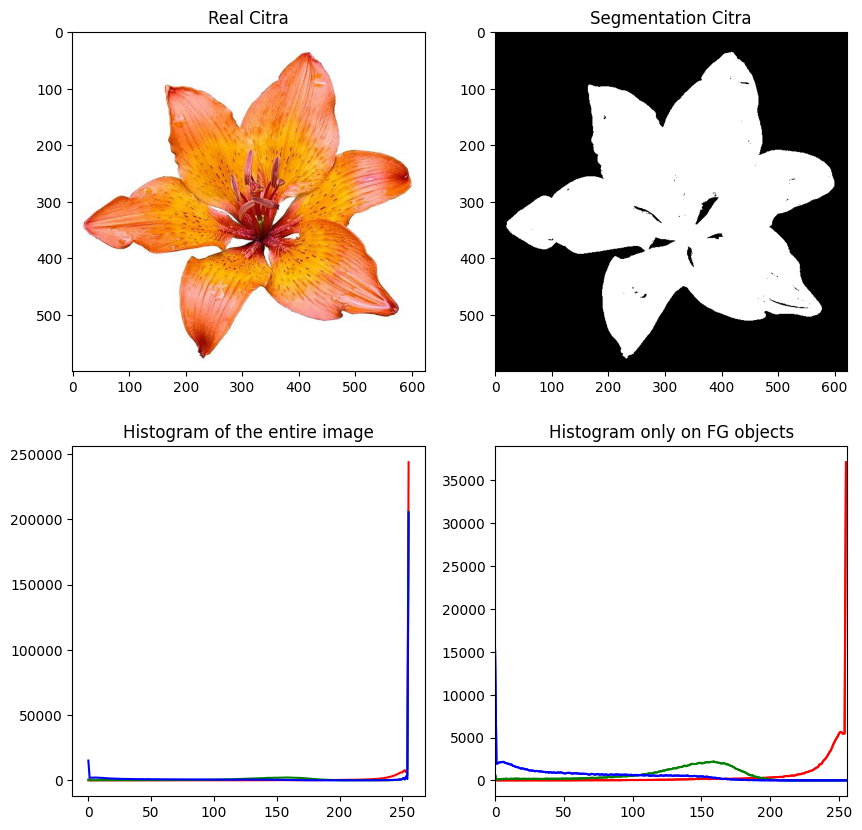

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename_lili = ('/content/drive/MyDrive/PCVK_MM/prac_week10/lily.jpg')

image = cv2.imread(filename_lili)  # Replace 'your_image.jpg' with your image filename

img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Real Citra')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Segmentation Citra')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram of the entire image')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram of the entire image')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram only on FG objects')
    plt.xlim([0,256])

plt.show()

Answer Number 6


In [45]:
from sklearn.cluster import KMeans  # Import KMeans from sklearn.cluster
from google.colab.patches import cv2_imshow

filename_p = ("/content/drive/MyDrive/PCVK_MM/prac_week10/peppers.jpg")

image = cv2.imread(filename_p) # Load the image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB

# Reshape the image to a 2D array of pixels
pixels_new = image_rgb.reshape((-1, 3))

# Define the number of clusters (K-Means)
k = 3

# Initialize K-Means
kmeans = KMeans(n_clusters=k)

# Fit K-Means to the data
kmeans.fit(pixels)

# Find the cluster centers
cluster_centers_new = kmeans.cluster_centers_
#===
# Define a threshold for yellow color (you may need to adjust this)
threshold_new = 80

# Create a mask for yellow pixels
yellow_mask = np.all(np.abs(pixels_new - cluster_centers_new) < threshold_new, axis=1)

# Reshape the mask to match the image shape
yellow_mask = yellow_mask.reshape(image_rgb.shape[:-1])
#===
# Create a background with the same color as the mask (e.g., white)
background_color = np.array([255, 255, 255], dtype=np.uint8)
background = np.full_like(image_rgb, background_color)
#===
result = np.where(yellow_mask[..., np.newaxis], image_rgb, background)
#===
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(122)
plt.title("Yellow Segmentation")
plt.imshow(result)
plt.axis('off')

plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


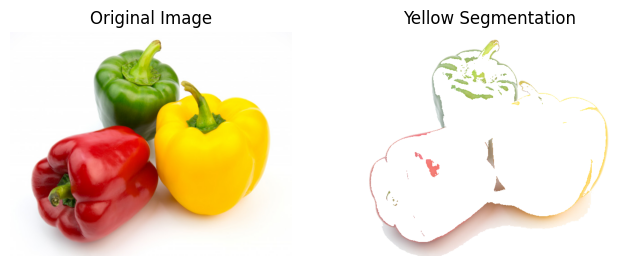

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the "peppers.jpg" image
image = cv2.imread(filename_p)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image data to a 2D array of pixels
pixels = image_rgb.reshape(-1, 3)

# Define the number of clusters (in this case, 1 for yellow)
n_clusters = 1

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(pixels)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Define a threshold for yellow color (you may need to adjust this)
threshold = 80

# Create a mask for yellow pixels
yellow_mask = np.all(np.abs(pixels - cluster_centers) < threshold, axis=1)

# Reshape the mask to match the image shape
yellow_mask = yellow_mask.reshape(image_rgb.shape[:-1])

# Create a background with the same color as the mask (e.g., white)
background_color = np.array([255, 255, 255], dtype=np.uint8)
background = np.full_like(image_rgb, background_color)

# Apply the mask to the background
result = np.where(yellow_mask[..., np.newaxis], image_rgb, background)

# Display the segmented image
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(122)
plt.title("Yellow Segmentation")
plt.imshow(result)
plt.axis('off')

plt.show()


Answer Number 7

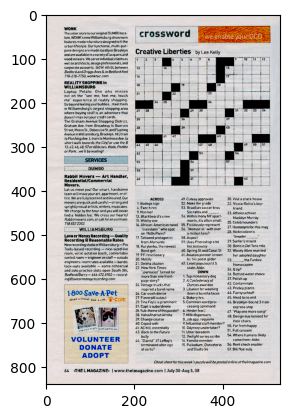

In [48]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK_MM/prac_week10/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()